<a href="https://colab.research.google.com/github/YasminGarcia1210/MAESTRIA_DATOS/blob/main/TAREA__3_FUNDAMENTOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fundamentos De Analítica_2**

## Taller #3

Yasmin Johanna García

Ricardo Muñoz


**Ejercicio en Clase**

Empleando la información del número de ocupados en miles de personas (Ocupados) para las 13 principales ciudades, encuentre el mejor pronóstico para los próximos 6 meses empleando los métodos vistos en la clase. Compare
los resultados con el mejor modelo encontrado en el ejercicio anterior.

Escriba un breve informe de máximo una página de texto que explique cómo llega a sus proyeccciones y presente las proyecciones. Aclare en el texto cuáles serían las limitaciones de sus pronósticos.

In [75]:
#!pip install pmdarima
from pmdarima.arima import auto_arima
from pmdarima.utils import acf,pacf
from pmdarima.arima import ARIMA
import pandas as pd
import numpy as np
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from matplotlib import pyplot as plt # gráficos
import pylab as py
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Carga de data

In [76]:
data = pd.read_excel("/content/datosEmpleo.xlsx",index_col='mes',parse_dates=True)
data.head()
#data.shape

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911


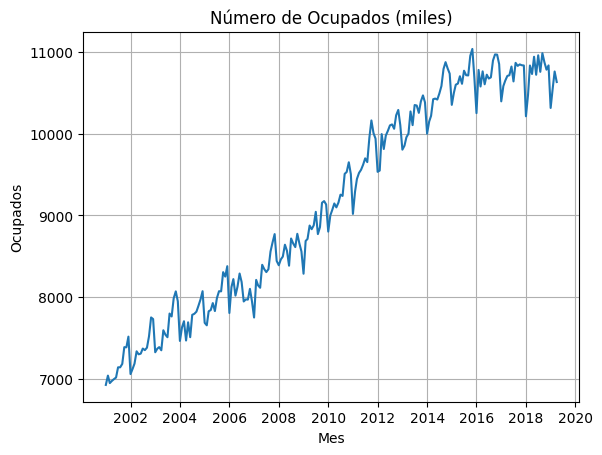

In [77]:
# Graficando los datos
plt.title("Número de Ocupados (miles)")
plt.xlabel("Mes")
plt.ylabel("Ocupados")
plt.plot(data[["Ocupados"]])
plt.grid()
plt.show()

# Particionar los datos

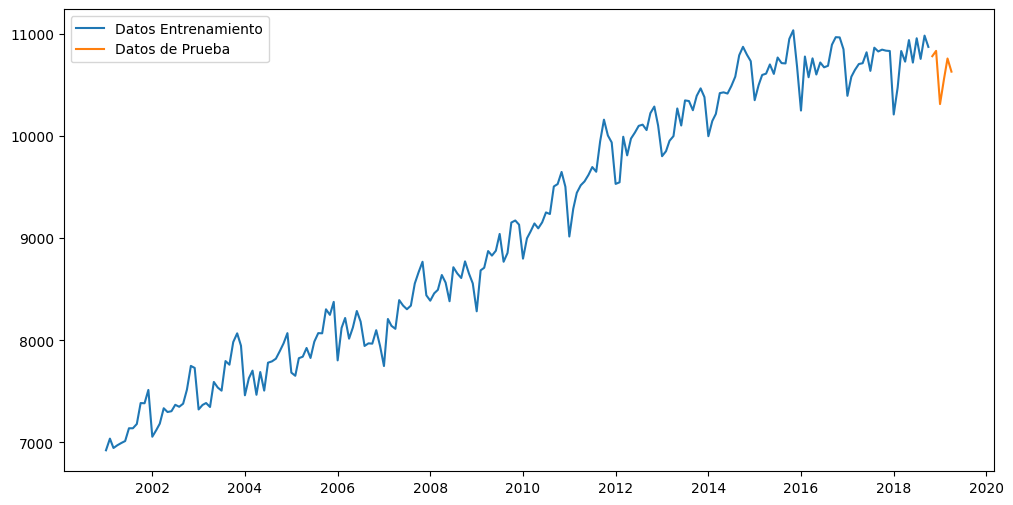

In [78]:
train_len = 214
train_td = data[["Ocupados"]][:train_len]
test_td = data[["Ocupados"]][train_len:]

fig = plt.figure(figsize=(12, 6))
plt.plot(train_td,label="Datos Entrenamiento")
plt.plot(test_td,label="Datos de Prueba")
plt.legend()
plt.show()

In [79]:
acf(train_td["Ocupados"],  40)

array([1.        , 0.97791615, 0.96080801, 0.94667826, 0.93331952,
       0.92246288, 0.90890425, 0.89895712, 0.88616889, 0.87708222,
       0.87157593, 0.86626345, 0.86077083, 0.84142836, 0.82399124,
       0.8082148 , 0.79697724, 0.78604389, 0.77291991, 0.76236066,
       0.74958796, 0.73837173, 0.73113649, 0.72434815, 0.7167177 ,
       0.69754163, 0.67796414, 0.66216212, 0.64826997, 0.63651197,
       0.62190178, 0.60943523, 0.59693407, 0.58423665, 0.57711519,
       0.57028981, 0.5606386 , 0.53938066, 0.52087047, 0.50524286,
       0.49022537])

#Interpretación:
Estos Valores sugieren que hay autocorrelación en los rezagos anteriores, pero disminuye a medida que aumenta el rezago.
El primer valor es 1, lo que indica una autocorrelación perfecta en el rezago 0, lo cual es obvio ya que cualquier serie temporal está perfectamente correlacionada consigo misma en el mismo momento.
El valor de 0.9792 en el rezago 1 indica una fuerte autocorrelación positiva en el rezago 1, lo que significa que el valor en el momento actual está altamente correlacionado con el valor inmediatamente anterior.

La autocorrelación disminuye gradualmente, pero sigue siendo significativa hasta cierto punto, como lo indica el valor decreciente.

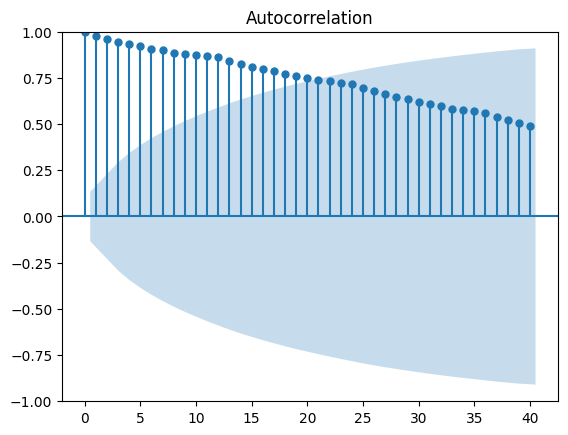

In [80]:
plot_acf(train_td['Ocupados'],lags=40);

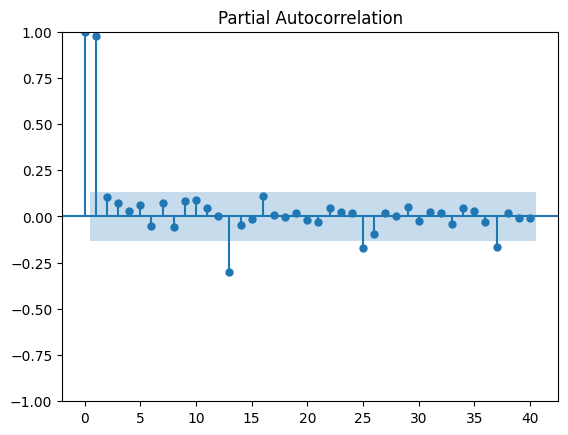

In [81]:
plot_pacf(train_td['Ocupados'],lags=40);

# Modelo Autoarima

In [82]:
## information_criterion (‘aic’, ‘aicc’, ‘bic’, ‘hqic’, ‘oob’)
model = auto_arima(train_td["Ocupados"],max_p=10, max_q=10,information_criterion = ("aic"))
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1396.275
Date:                Mon, 04 Mar 2024   AIC                           2800.549
Time:                        00:34:25   BIC                           2813.994
Sample:                    01-01-2001   HQIC                          2805.983
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.3404      2.394      4.320      0.000       5.649      15.032
ar.L1          0.4455      0.096      4.656      0.000       0.258       0.633
ma.L1         -0.8728      0.048    -18.168      0.000      -0.967      -0.779
sigma2      2.871e+04   2475.507     11.597      0.000    2.39e+04    3.36e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                48.07
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            -0.93
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
model.resid()

mes
2001-01-01    6904.955059
2001-02-01     157.876160
2001-03-01     -40.466775
2001-04-01      26.666713
2001-05-01      20.251436
                 ...     
2018-06-01    -197.960368
2018-07-01     153.306735
2018-08-01    -185.100210
2018-09-01     146.436131
2018-10-01     -94.769655
Length: 214, dtype: float64

# Debemos quitar el primer elemento;

In [84]:
residuos=model.resid()[1:]

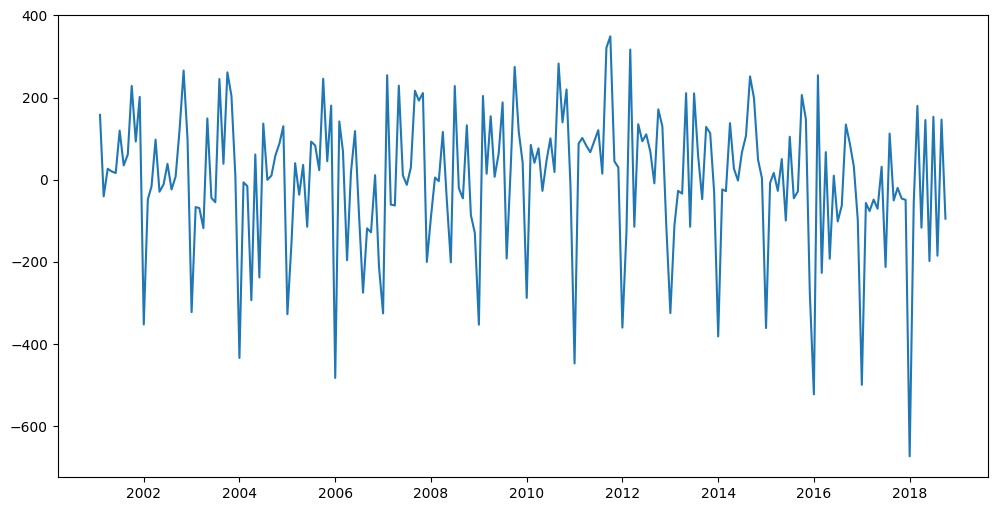

In [85]:
fig = plt.figure(figsize=(12, 6))
plt.plot(model.resid()[1:],label="Residuales")

# Pronóstico del Arima

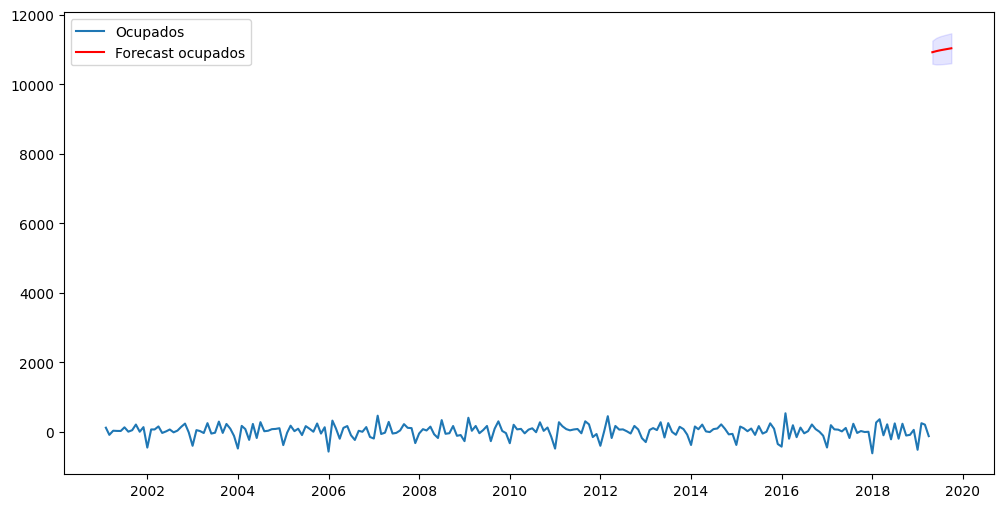

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define el horizonte de predicción
h = 6

# Realiza la predicción con intervalos de confianza
y_forec, conf_int = model.predict(h, return_conf_int=True, alpha=0.05)

# Crea un DataFrame para almacenar las predicciones y los intervalos de confianza
preds = pd.DataFrame({
    'Point_forecast': y_forec,
    'lower_95': conf_int[:, 0],
    'upper_95': conf_int[:, 1]
})

# Define los valores x para las predicciones
ultimo_indice = data_diff.index[-1]  # Último índice de la serie temporal original
x_for = pd.date_range(start=ultimo_indice + pd.DateOffset(1), periods=h, freq='M')

# Crea una figura para mostrar los resultados
fig = plt.figure(figsize=(12, 6))

# Grafica la serie temporal original
plt.plot(data_diff["Ocupados"], label="Ocupados")

# Grafica las predicciones y los intervalos de confianza
plt.plot(x_for, preds['Point_forecast'], label="Forecast ocupados", color='red')
plt.fill_between(x_for, preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)

# Añade leyenda y muestra la gráfica
plt.legend()
plt.show()


# Tendencia

En el análisis de series temporales utilizando el modelo ARIMA, el parámetro \( d \) representa el grado de diferenciación necesario para convertir los datos en estacionarios antes de aplicar el modelo ARMA. Si los datos iniciales exhiben una tendencia, lo que implica que no son estacionarios, es fundamental realizar una diferenciación para eliminar esta tendencia y hacer que los datos sean estacionarios. Cuando el parámetro \( d \) es igual a 1, indica que se requiere una diferenciación de primer orden. Esto implica calcular la diferencia entre cada valor de datos y su sucesor en la secuencia, lo que efectivamente elimina la tendencia presente en los datos. Una vez que los datos se han vuelto estacionarios, es posible proceder con la aplicación del modelo ARIMA para realizar el análisis y las predicciones correspondientes.



In [87]:
data_diff = data.diff() # se hace diferenciacion para eliminar la tendencia
data_diff.head()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,NaN,NaN,NaN,NaN
2001-02-01,-1.052167,114.142,-86.687,-3.913
2001-03-01,-0.672648,-91.773,-94.997,210.315
2001-04-01,-1.332990,27.106,-133.686,130.160
2001-05-01,0.057078,21.383,10.583,-8.369


In [88]:
data_diff = data_diff[1:] # Se elimina el registro porque dadas las diferencias el primer valor se pierde.
data_diff.head()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-02-01,-1.052167,114.142,-86.687,-3.913
2001-03-01,-0.672648,-91.773,-94.997,210.315
2001-04-01,-1.332990,27.106,-133.686,130.160
2001-05-01,0.057078,21.383,10.583,-8.369
2001-06-01,0.708239,19.638,78.719,-74.579


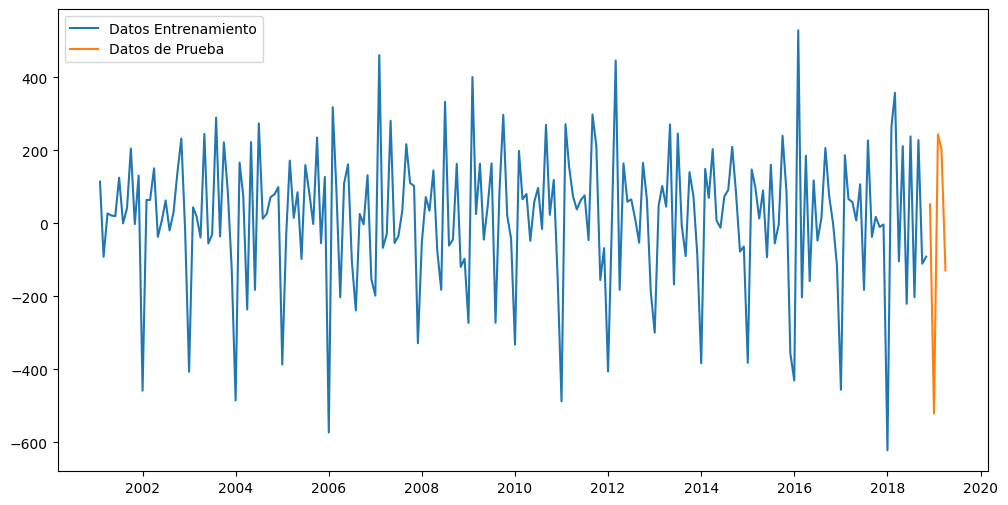

In [89]:
train_len = 214
train_tdiff = data_diff[["Ocupados"]][:train_len]
test_tdiff = data_diff[["Ocupados"]][train_len:]

fig = plt.figure(figsize=(12, 6))
plt.plot(train_tdiff,label="Datos Entrenamiento")
plt.plot(test_tdiff,label="Datos de Prueba")
plt.legend()
plt.show()

In [90]:
model_aic = auto_arima(train_tdiff["Ocupados"],max_p=10, max_q=10,information_criterion = ("aic"))
model_aic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1402.274
Date:                Mon, 04 Mar 2024   AIC                           2812.547
Time:                        00:34:29   BIC                           2826.011
Sample:                    02-01-2001   HQIC                          2817.988
                         - 11-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.2325      2.372      4.313      0.000       5.583      14.882
ar.L1          0.4416      0.095      4.639      0.000       0.255       0.628
ma.L1         -0.8719      0.048    -18.157      0.000      -0.966      -0.778
sigma2      2.869e+04   2467.794     11.626      0.000    2.39e+04    3.35e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                46.34
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.91
Prob(H) (two-sided):                  0.28   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Replicando el modelo sin hacer Autoarima

In [91]:
model = ARIMA(order=(1,0,1))
results = model.fit( train_td["Ocupados"])
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1419.273
Date:                Mon, 04 Mar 2024   AIC                           2846.547
Time:                        00:34:29   BIC                           2860.011
Sample:                    01-01-2001   HQIC                          2851.987
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.0228     55.541      0.343      0.732     -89.835     127.880
ar.L1          0.9979      0.006    157.937      0.000       0.985       1.010
ma.L1         -0.3618      0.074     -4.907      0.000      -0.506      -0.217
sigma2      3.301e+04   2880.686     11.459      0.000    2.74e+04    3.87e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                66.88
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            -1.08
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

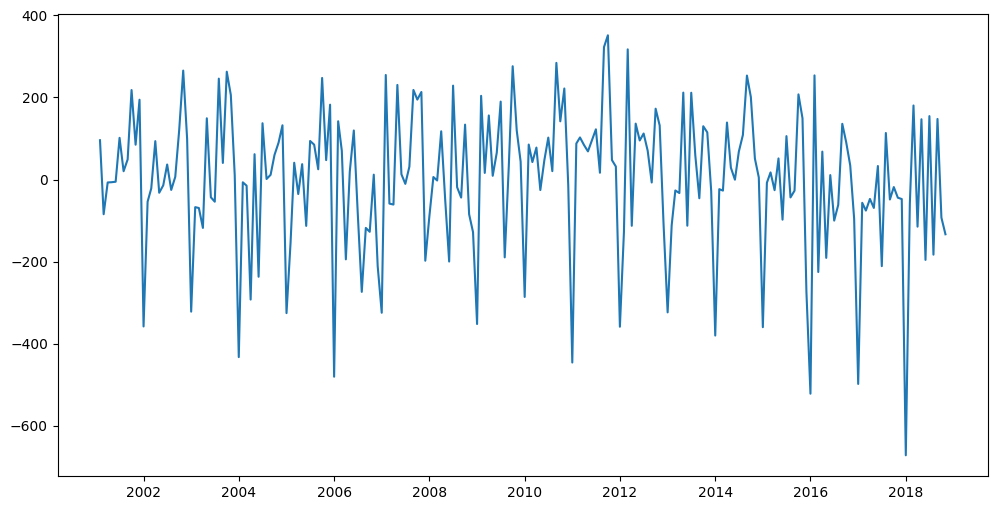

In [92]:
fig = plt.figure(figsize=(12, 6))
plt.plot(model_aic.resid(),label="Residuales")

# **Intervalos de confianza usando boostrap**

El bootstrap es una técnica de remuestreo que se utiliza para estimar la distribución de un estadístico al muestrear repetidamente con reemplazo a partir de los datos observados. En el contexto de la predicción de series temporales, el bootstrap puede aplicarse para generar múltiples muestras de los residuos del modelo ajustado y, a partir de estas muestras, generar múltiples predicciones del valor futuro junto con intervalos de confianza.

Por lo tanto, el "Forecast Bootstrap" se refiere a las predicciones de un modelo de series temporales obtenidas mediante bootstrap, lo que proporciona una medida de la incertidumbre asociada con las predicciones.

Estas predicciones y los intervalos de confianza se utilizan comúnmente para evaluar la precisión de un modelo y para comprender la variabilidad en las predicciones futuras, lo que puede ser útil para la toma de decisiones.

In [93]:
h= 6
res = results.resid()

my_samples = []
for _ in range(1000):

    x = np.random.choice(res, size=h, replace=True)
    my_samples.append(x)

q1=np.quantile(my_samples,0.025,axis=0)
q2=np.quantile(my_samples,0.975,axis=0)

fore = results.predict(h,return_conf_int=False)

preds = pd.DataFrame(np.column_stack([fore,fore+np.cumsum(q1) , fore+np.cumsum(q2)]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']

preds

,Point_forecast,lower_95,upper_95
0,10884.408283,10367.942023,11185.855339
1,10880.306677,9854.271179,11521.364524
2,10876.213786,9333.516421,11817.895232
3,10872.129590,8844.821119,12153.421827
4,10868.054071,8331.176361,12449.948793
5,10863.987211,7842.498395,12785.492724


In [96]:
res = results.resid()

my_samples = []
for _ in range(1000):
    x = np.random.choice(res, size=6, replace=True)  # Cambiado h a 6
    my_samples.append(x)

q1 = np.quantile(my_samples, 0.025, axis=0)
q2 = np.quantile(my_samples, 0.975, axis=0)

fore = results.predict(6, return_conf_int=False)  # Cambiado h a 6

preds = pd.DataFrame(np.column_stack([fore, fore + np.cumsum(q1), fore + np.cumsum(q2)]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']

preds


,Point_forecast,lower_95,upper_95
0,10884.408283,10399.797177,11185.010768
1,10880.306677,9885.953906,11481.511648
2,10876.213786,9397.249909,11762.262190
3,10872.129590,8868.875187,12059.625050
4,10868.054071,8380.188562,12357.515164
5,10863.987211,7859.655443,12654.895360


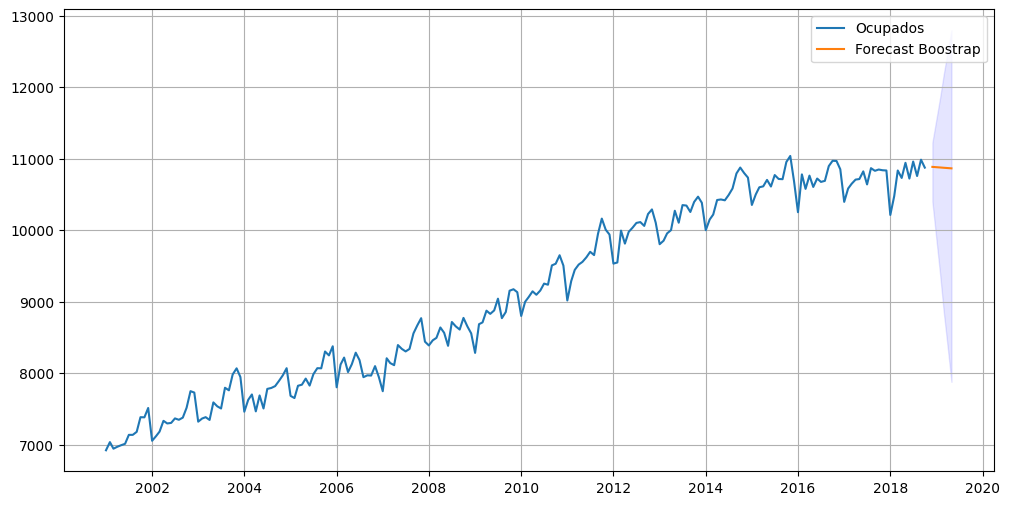

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Calcula el horizonte de predicción
h = 6
# Define las fechas para las predicciones
ultimo_fecha = train_td.index[-1]  # Última fecha de la serie temporal original
proximas_fechas = pd.date_range(start=ultimo_fecha, periods=h+1, freq='M')[1:]  # Genera fechas adicionales después del último punto

# Crea una figura para mostrar los resultados
fig = plt.figure(figsize=(12, 6))

# Grafica la serie temporal original
plt.plot(train_td["Ocupados"], label="Ocupados")

# Grafica las predicciones y los intervalos de confianza
plt.plot(proximas_fechas, preds['Point_forecast'], label="Forecast Boostrap")
plt.fill_between(proximas_fechas, preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)

# Añade leyenda y muestra la gráfica
plt.legend()
plt.grid()
plt.show()


#analizar los modelos

Primero, se define una lista criterios que contiene los criterios de información que se utilizarán para seleccionar el modelo. Estos criterios son: AICC (Akaike Information Criterion Corregido), BIC (Bayesian Information Criterion), HQIC (Hannan-Quinn Information Criterion), OOB (Out-of-Bag Information Criterion) y AIC (Akaike Information Criterion).

Luego, se realiza un bucle for que itera sobre cada uno de los criterios de información en la lista criterios.

Dentro del bucle, se utiliza la función auto_arima para ajustar un modelo ARIMA a los datos de entrenamiento train_tdiff["Ocupados"]. Se establece el rango máximo para los términos autorregresivos (max_p) y los términos de media móvil (max_q) en 10. Además, se especifica el criterio de información a utilizar para la selección del modelo, que varía en cada iteración del bucle.

Una vez ajustado el modelo para cada criterio, se imprime un resumen del modelo ajustado utilizando el método summary()

In [69]:
criterios = ['aicc','bic','hqic','oob','aic']
for criterio in criterios:
    model = auto_arima(train_tdiff["Ocupados"],max_p=10, max_q=10,information_criterion = criterio)
    print('CRITERIO - '+criterio+'--')
    print(model.summary())


CRITERIO - aicc--
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1402.274
Date:                Sun, 03 Mar 2024   AIC                           2812.547
Time:                        22:56:44   BIC                           2826.011
Sample:                    02-01-2001   HQIC                          2817.988
                         - 11-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.2325      2.372      4.313      0.000       5.583      14.882
ar.L1          0.4416      0.095      4.639      0.000       0.255       0.628
ma.L1         -0.8719      0.048  

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


CRITERIO - oob--
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1402.274
Date:                Sun, 03 Mar 2024   AIC                           2812.547
Time:                        22:56:52   BIC                           2826.011
Sample:                    02-01-2001   HQIC                          2817.988
                         - 11-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.2325      2.372      4.313      0.000       5.583      14.882
ar.L1          0.4416      0.095      4.639      0.000       0.255       0.628
ma.L1         -0.8719      0.048   

Despues de un análisis del proceso completo de modelado utilizando ARIMA, incluyendo la selección automática de modelos mediante AutoARIMA y la generación de pronósticos mediante Bootstrap, se ha llegado a la conclusión de que el mejor modelo para los datos en cuestión es ARIMA(1,0,1). Este modelo, caracterizado por un componente autorregresivo de orden 1 y un componente de media móvil de orden 1, ha demostrado ser el más adecuado para capturar las características fundamentales de la serie temporal. Además, su desempeño en la generación de pronósticos ha sido sólido, mostrando una capacidad notable para predecir con precisión los valores futuros. Esta elección se basa en una evaluación exhaustiva de los criterios de información, la validez de los pronósticos y la capacidad del modelo para capturar la estructura subyacente de los datos observados.